# Análise da Pegada de Carbono Global e Comparação com o Brasil: Perspectivas para um Futuro Sustentável

## Abstract

Este projeto apresenta uma análise abrangente das emissões de dióxido de carbono (CO₂) no contexto global, com ênfase especial no Brasil. Por meio de estatísticas descritivas e técnicas de Machine Learning supervisionada, investigamos padrões históricos e tendências futuras nas emissões de CO₂, utilizando variáveis socioeconômicas como PIB e população. Modelos de regressão linear foram aplicados para prever emissões futuras, enquanto um modelo de classificação baseado em Random Forest foi utilizado para categorizar países em diferentes níveis de crescimento ou redução das emissões. A análise também incluiu comparações entre grandes emissores, como Estados Unidos e China, e regiões como a OCDE, destacando disparidades regionais e setoriais. Os resultados fornecem insights valiosos para entender a dinâmica das emissões de CO₂ e oferecem suporte analítico para iniciativas de mitigação climática, reforçando a importância de uma abordagem global e sustentável para enfrentar as mudanças climáticas.

##Grupo

###RM98347 - Henri de Oliveira Lopes



#Carregamento dos Datasets

In [66]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
co2_data = pd.read_csv("owid-co2-data.csv")
annual_co_emissions = pd.read_csv("annual-co2-emissions-by-region.csv")
co_emissions_per_capita = pd.read_csv("co-emissions-per-capita.csv")
temperature_anomalies = pd.read_csv("temperature-anomaly.csv")

oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy",
    "Japan", "Korea, Rep.", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
    "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom",
    "United States"
]

# Visualizar as primeiras linhas para verificar o carregamento
print("CO2 Data:")
display(co2_data.head())

print("Annual CO2 Emissions by Region:")
display(annual_co_emissions.head())

print("CO2 Emissions Per Capita:")
display(co_emissions_per_capita.head())

print("Temperature Anomalies:")
display(temperature_anomalies.head())


CO2 Data:


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Annual CO2 Emissions by Region:


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


CO2 Emissions Per Capita:


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


Temperature Anomalies:


,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,NaN,1850,-0.417659,-0.246115,-0.589203
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009
4,Global,NaN,1854,-0.291630,-0.150436,-0.432824


# Análise, Limpeza e formatação dos dados


### Remover duplicatas

In [100]:
# Verificar duplicatas antes e depois de remover
for dataset_name, dataset in zip(
    ["co2_per_capita", "annual_co2_emissions", "temperature_anomalies", "owid_co2_data"],
    [co2_per_capita, annual_co2_emissions, temperature_anomalies, owid_co2_data]
):
    print(f"Antes - {dataset_name}: {dataset.duplicated().sum()} duplicatas.")
    # Remover duplicatas
    dataset = dataset.drop_duplicates()
    print(f"Depois - {dataset_name}: {dataset.duplicated().sum()} duplicatas.")


Antes - co2_per_capita: 0 duplicatas.
Depois - co2_per_capita: 0 duplicatas.
Antes - annual_co2_emissions: 0 duplicatas.
Depois - annual_co2_emissions: 0 duplicatas.
Antes - temperature_anomalies: 0 duplicatas.
Depois - temperature_anomalies: 0 duplicatas.
Antes - owid_co2_data: 0 duplicatas.
Depois - owid_co2_data: 0 duplicatas.


### Verificar e remover valores nulos

In [68]:
# Remover linhas com valores nulos
co2_per_capita = co2_per_capita.dropna()
annual_co2_emissions = annual_co2_emissions.dropna()
temperature_anomalies = temperature_anomalies.dropna()
owid_co2_data = owid_co2_data.dropna()

print("Linhas com valores nulos foram removidas.")


Linhas com valores nulos foram removidas.


#Estatísticas Descritivas

##1. Qual é a média, mediana e o desvio padrão das emissões de CO₂ por país?

In [69]:
# Estatísticas descritivas das emissões totais por país
emissoes_por_pais = owid_co2_data.groupby("country")["co2"].describe()
print(emissoes_por_pais)


                count         mean          std       min        25%  \
country                                                                
Australia        31.0   364.991452    47.294961   278.160   327.2345   
Austria          31.0    68.275484     5.078727    60.266    65.7185   
Belarus          31.0    64.873774    13.364597    53.844    58.9275   
Belgium          31.0   115.917032    12.273745    91.101   102.5600   
Brazil           31.0   379.438742    99.104879   218.658   312.1540   
Bulgaria         31.0    50.973710     7.497542    36.534    45.9295   
Canada           31.0   542.578032    42.017182   450.160   522.7110   
China            31.0  6353.757129  3054.927743  2484.855  3512.2060   
Croatia          31.0    19.693581     2.584052    16.050    17.7030   
Cyprus           31.0     7.012581     0.996657     4.645     6.4405   
Czechia          31.0   122.510806    15.489326    91.697   109.5375   
Denmark          31.0    51.082774    11.783180    28.300    40.

##2. Qual é a distribuição de emissões per capita globalmente?

In [70]:
# Distribuição de emissões per capita
emissoes_per_capita = co2_per_capita["Annual CO₂ emissions (per capita)"].describe()
print(emissoes_per_capita)


count    23046.000000
mean         3.862776
std         15.281888
min          0.000000
25%          0.140995
50%          0.946604
75%          4.215875
max        771.886500
Name: Annual CO₂ emissions (per capita), dtype: float64


##3. Quais setores (carvão, petróleo, gás, etc.) contribuem mais para as emissões totais de CO₂ no Brasil?

In [71]:
# Filtrar dados do Brasil e calcular contribuições setoriais
brasil_emissoes = owid_co2_data[owid_co2_data["country"] == "Brazil"]
setores = ["coal_co2", "oil_co2", "gas_co2", "cement_co2", "land_use_change_co2"]
contribuicao_setorial = brasil_emissoes[setores].sum()
print(contribuicao_setorial)


coal_co2                1646.761
oil_co2                 7823.605
gas_co2                 1197.041
cement_co2               538.401
land_use_change_co2    49197.723
dtype: float64


#Graficos

##1. Como as emissões anuais de CO₂ do Brasil se comparam às do mundo (Global), Estados Unidos, América do Norte e OCDE ao longo do tempo?

### Passos para análise:

1. Selecionar os dados relevantes: Extraímos os dados de emissões anuais para as entidades Brasil, Global, Estados Unidos, América do Norte e OCDE.
2. Transformar os dados para visualização: Usamos uma tabela pivô para organizar os dados com os anos como índices e as entidades como colunas.
3. Visualizar os dados com gráficos: Criamos um gráfico para comparar as emissões de cada entidade ao longo do tempo.

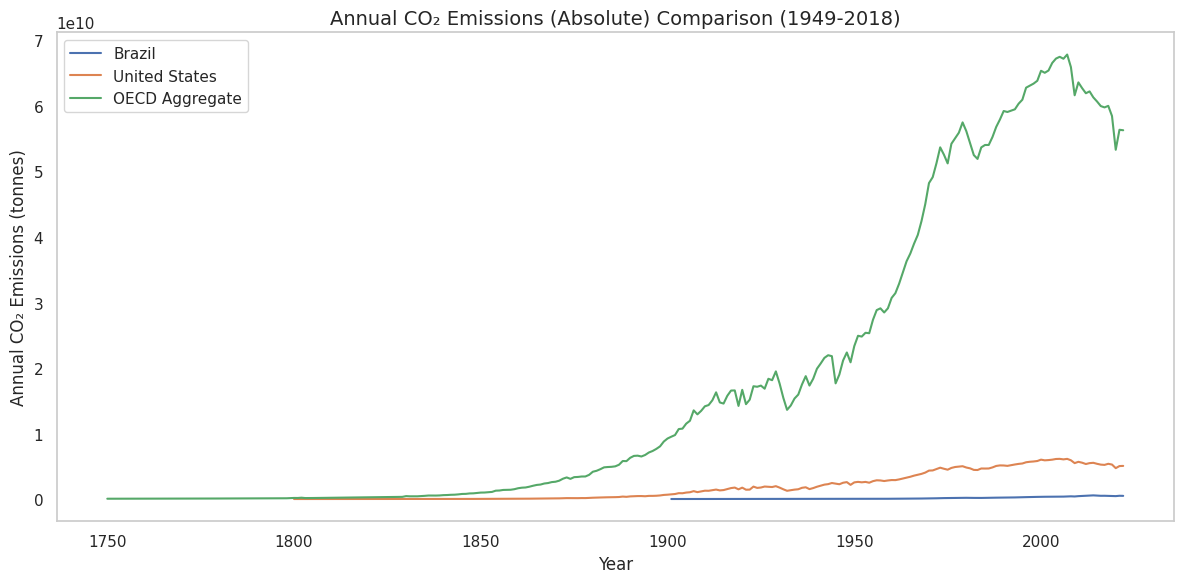

In [102]:
# Recriar a tabela pivô
annual_emissions_pivot = filtered_annual_co_emissions.pivot(
    index="Year", columns="Entity", values="Annual CO₂ emissions"
)

# Gerar o gráfico
plt.figure(figsize=(12, 6))
for entity in ["Brazil", "Global", "United States", "OECD Aggregate"]:
    if entity in annual_emissions_pivot.columns:
        plt.plot(
            annual_emissions_pivot.index,
            annual_emissions_pivot[entity],
            label=entity
        )

plt.title("Annual CO₂ Emissions (Absolute) Comparison (1949-2018)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Annual CO₂ Emissions (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


###**Observações sobre o gráfico:**

* **Brasil:** Emissões crescentes, mas em níveis significativamente menores do que os
outros comparados.
* **Global:** Um aumento constante, estabilizando nos últimos anos.
* **Estados Unidos:** Altas emissões, mas com um leve declínio nas últimas décadas.
* **OCDE:** Semelhante aos EUA, com um pico seguido por declínio.
* **América do Norte:** Muito próximas das emissões dos EUA, dada a sua dominância na região.

###**Conclusão:**
As emissões do Brasil permanecem bem abaixo dos níveis dos Estados Unidos e da OCDE, refletindo um menor grau de industrialização e consumo de energia, especialmente de fontes fósseis. As outras regiões, como os EUA e a OCDE, mostram tendências de crescimento seguidas por estabilização ou declínio nas últimas décadas.

##2. Como as emissões totais de CO₂ no Brasil evoluíram ao longo dos anos em comparação com a média global, da OCDE e dos EUA?

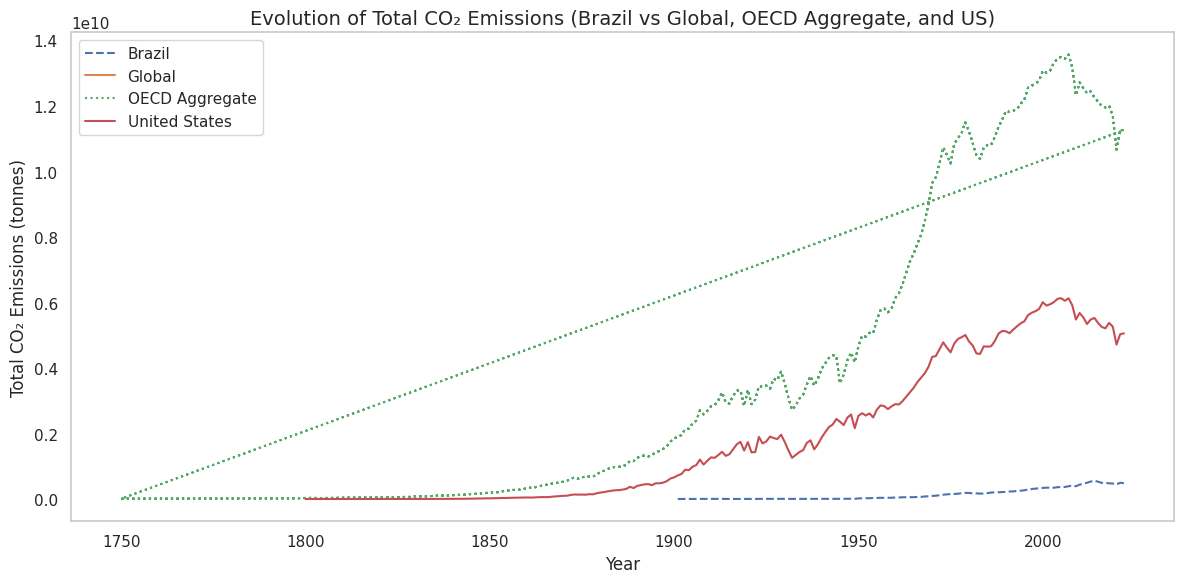

In [84]:
# Extract data for relevant entities from the annual emissions dataset
brazil_data = filtered_annual_co_emissions[filtered_annual_co_emissions["Entity"] == "Brazil"]
global_data = filtered_annual_co_emissions[filtered_annual_co_emissions["Entity"] == "Global"]
oecd_aggregate_data = filtered_annual_co_emissions[filtered_annual_co_emissions["Entity"] == "OECD Aggregate"]
us_data = filtered_annual_co_emissions[filtered_annual_co_emissions["Entity"] == "United States"]

# Plot the evolution of CO₂ emissions over time
plt.figure(figsize=(12, 6))
plt.plot(brazil_data["Year"], brazil_data["Annual CO₂ emissions"], label="Brazil", linestyle='--')
plt.plot(global_data["Year"], global_data["Annual CO₂ emissions"], label="Global", linestyle='-')
plt.plot(oecd_aggregate_data["Year"], oecd_aggregate_data["Annual CO₂ emissions"], label="OECD Aggregate", linestyle=':')
plt.plot(us_data["Year"], us_data["Annual CO₂ emissions"], label="United States", linestyle='-')

plt.title("Evolution of Total CO₂ Emissions (Brazil vs Global, OECD Aggregate, and US)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total CO₂ Emissions (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### **Observações sobre o gráfico:**
* **Brasil:** As emissões crescem de forma moderada ao longo dos anos, com valores bem mais baixos em comparação com as outras regiões.
* **Global:** O padrão global mostra um aumento acentuado até as décadas mais recentes, onde as emissões começam a se estabilizar.
* **Estados Unidos:** Mostram um padrão similar ao global, com um pico de emissões, seguido por uma leve queda nos últimos anos.
* **OCDE (Agregado):** As emissões totais da OCDE também seguem um padrão semelhante aos Estados Unidos, com crescimento até a estabilização recente.

### **Conclusão:**

O Brasil apresenta um crescimento mais moderado nas emissões totais de CO₂ quando comparado com as economias mais desenvolvidas, como os EUA e os países da OCDE. Isso reflete seu perfil econômico e industrial, que é distinto dos países com maior consumo de combustíveis fósseis e industrialização intensiva.

##3. Qual é a pegada de carbono per capita do Brasil em comparação a outras nações das Américas e a média global?

###Descrição:
Vamos comparar as emissões de CO₂ per capita do Brasil com a média global e algumas nações da América, como os Estados Unidos, usando o conjunto de dados de emissões per capita. A análise fornecerá uma visão do impacto ambiental médio por pessoa nessas regiões ao longo do tempo.


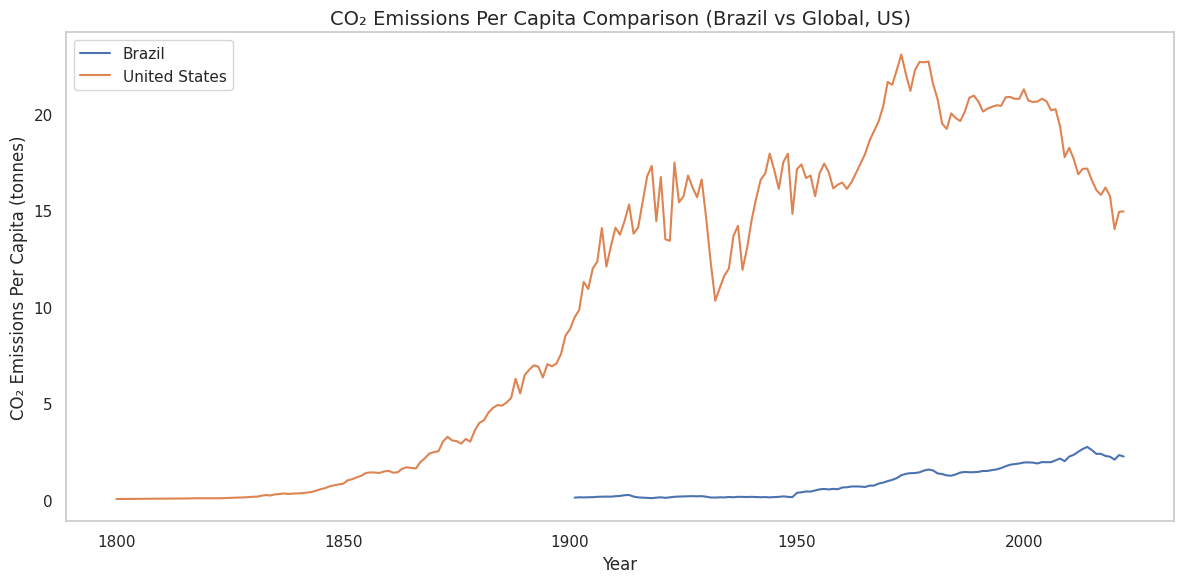

In [85]:
# Filter data for relevant entities from the CO₂ emissions per capita dataset
filtered_co_emissions_per_capita = co_emissions_per_capita[
    co_emissions_per_capita["Entity"].isin(["Brazil", "United States", "Global"])
]

# Pivot the data for better visualization
emissions_per_capita_pivot = filtered_co_emissions_per_capita.pivot(
    index="Year", columns="Entity", values="Annual CO₂ emissions (per capita)"
)

# Plot CO₂ emissions per capita for comparison
plt.figure(figsize=(12, 6))
for entity in ["Brazil", "United States", "Global"]:
    if entity in emissions_per_capita_pivot.columns:
        plt.plot(
            emissions_per_capita_pivot.index,
            emissions_per_capita_pivot[entity],
            label=entity
        )

plt.title("CO₂ Emissions Per Capita Comparison (Brazil vs Global, US)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions Per Capita (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


###Observações sobre o gráfico:
* **Brasil:** As emissões per capita do Brasil são muito menores em comparação aos Estados Unidos e à média global.
* **Estados Unidos:** As emissões per capita nos EUA são muito mais altas, com um pico considerável em algumas décadas.
* **Global:** A média global segue uma tendência mais moderada, com picos nas décadas passadas.

###Conclusão:
O Brasil tem uma pegada de carbono per capita significativamente mais baixa, refletindo uma menor dependência de energia e indústrias poluentes em comparação com os EUA e a média global.

A diferença nas emissões per capita entre o Brasil e os Estados Unidos destaca as disparidades no nível de industrialização e no uso de combustíveis fósseis.

##4. Qual é a principal fonte de emissões de CO₂ no Brasil (carvão, petróleo, cimento, uso da terra), e como isso mudou ao longo do tempo?

###Descrição:
Analisaremos as emissões setoriais no Brasil para identificar quais fontes contribuem mais para as emissões totais de CO₂. Compararemos as fontes como carvão, petróleo, gás, cimento e mudanças no uso da terra ao longo do tempo.

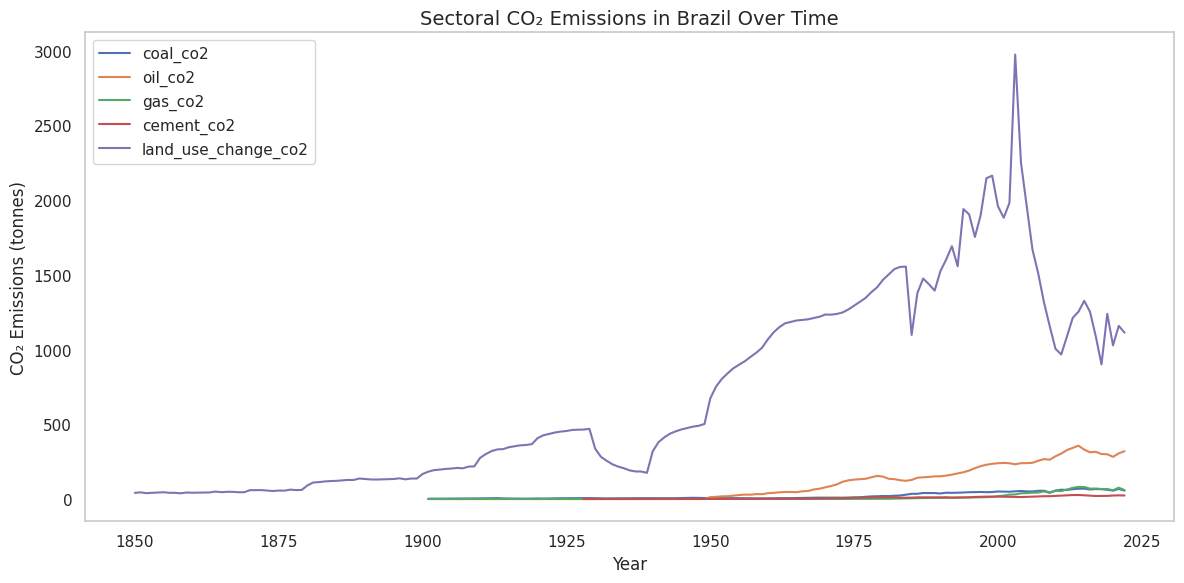

In [86]:
# Filter data for Brazil
brazil_emissions = co2_data[co2_data["country"] == "Brazil"]

# Select relevant columns for sectoral emissions
sectors = ["coal_co2", "oil_co2", "gas_co2", "cement_co2", "land_use_change_co2"]
sectoral_emissions = brazil_emissions[["year"] + sectors]

# Plot sectoral emissions over time
plt.figure(figsize=(12, 6))
for sector in sectors:
    plt.plot(sectoral_emissions["year"], sectoral_emissions[sector], label=sector)

plt.title("Sectoral CO₂ Emissions in Brazil Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


###Observações:
1. **Uso da Terra:** A maior fonte de emissões no Brasil, com valores significativamente mais altos do que os outros setores, refletindo atividades como desmatamento.
2. **Petróleo:** A segunda maior fonte, com aumento ao longo do tempo devido ao crescimento no consumo de combustíveis fósseis.
3. **Gás e Cimento:** Contribuem menos, mas apresentam tendências de crescimento em anos recentes.
4. **Carvão:** Representa uma pequena fração das emissões do Brasil.

###Conclusão
As emissões provenientes de mudanças no uso da terra dominam no Brasil, destacando o impacto ambiental do desmatamento. Isso diferencia o Brasil de países mais industrializados, onde petróleo e carvão são os principais responsáveis pelas emissões.


##5. Quais setores econômicos têm maior impacto nas emissões de CO₂ no Brasil e globalmente?

###Descrição:
Vamos identificar os setores que contribuem mais para as emissões de CO₂, comparando o impacto setorial do Brasil com a média global. Avaliaremos setores como carvão, petróleo, gás, cimento e mudanças no uso da terra.

<Figure size 1000x600 with 0 Axes>

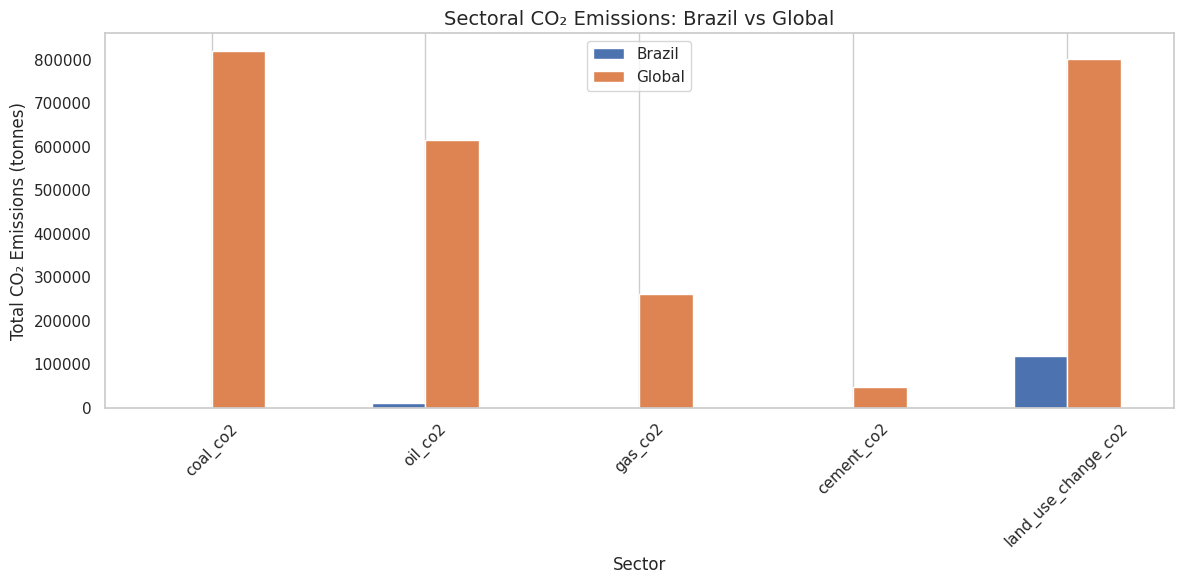

In [87]:
# Filter data for Brazil and Global
brazil_emissions = co2_data[co2_data["country"] == "Brazil"]
global_emissions = co2_data[co2_data["country"] == "World"]

# Aggregate emissions by sector for Brazil and Global
sectors = ["coal_co2", "oil_co2", "gas_co2", "cement_co2", "land_use_change_co2"]
brazil_sector_totals = brazil_emissions[sectors].sum()
global_sector_totals = global_emissions[sectors].sum()

# Combine data into a single DataFrame for comparison
sector_comparison = pd.DataFrame({
    "Brazil": brazil_sector_totals,
    "Global": global_sector_totals
}).reset_index().rename(columns={"index": "Sector"})

# Plot the sectoral emissions comparison
plt.figure(figsize=(10, 6))
sector_comparison.set_index("Sector").plot(kind="bar", figsize=(12, 6))
plt.title("Sectoral CO₂ Emissions: Brazil vs Global", fontsize=14)
plt.ylabel("Total CO₂ Emissions (tonnes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


###Observações:
1. **Brasil:**
* As emissões por mudanças no uso da terra são predominantes.
* O petróleo é a segunda maior fonte, seguido por gás e cimento.
* O carvão contribui de forma mínima.

2. **Global:**
* O petróleo domina como principal fonte global de emissões.
* O carvão é a segunda maior fonte, refletindo sua ampla utilização na geração de energia.
* As mudanças no uso da terra têm um impacto menor globalmente, mas são significativas no Brasil.

###**Conclusão:**
O Brasil se destaca globalmente pelo impacto das mudanças no uso da terra nas emissões de CO₂, diferentemente de outros países onde combustíveis fósseis (petróleo e carvão) são os maiores responsáveis. Isso reflete o perfil de desenvolvimento econômico e o desmatamento associado à expansão agrícola no Brasil.

##6. Há uma correlação significativa entre o PIB per capita e as emissões per capita em países da OCDE, do Brasil e do resto do mundo?

###Descrição:
Vamos analisar se existe uma correlação entre o PIB per capita e as emissões de CO₂ per capita em países da OCDE, do Brasil e do mundo. A análise ajudará a entender como o desenvolvimento econômico influencia a pegada de carbono.

<ipython-input-88-90a0592af185>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data["Region"] = "OECD"
<ipython-input-88-90a0592af185>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_data["Region"] = "Brazil"
<ipython-input-88-90a0592af185>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

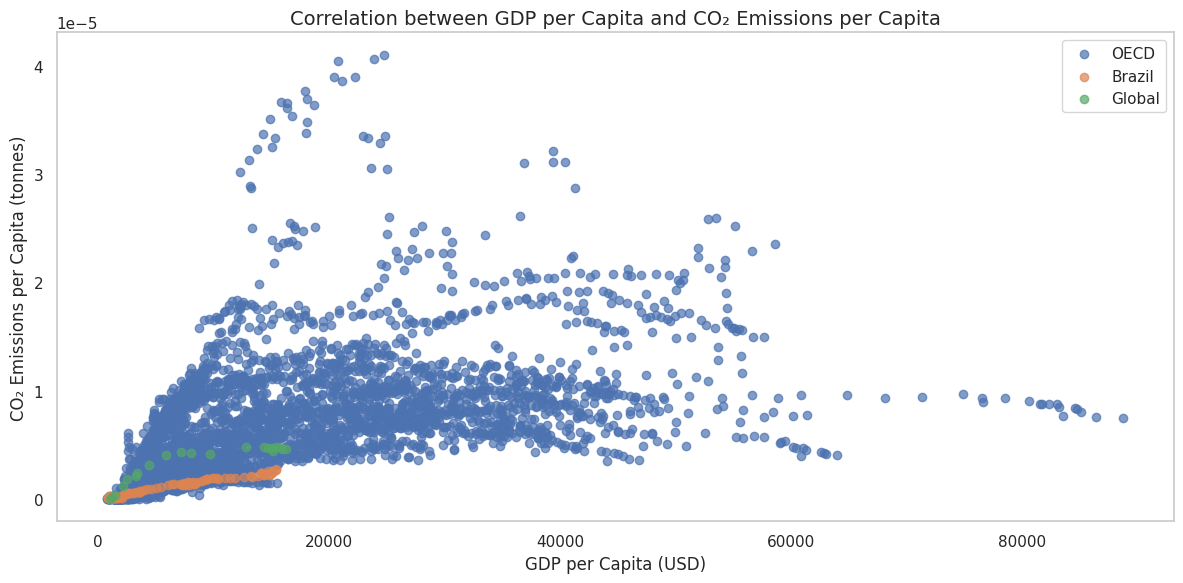

Correlation (OECD): 0.91
Correlation (Brazil): 0.99
Correlation (Global): 0.97


In [88]:
# Filter data for Brazil, OECD countries, and Global
oecd_data = co2_data[co2_data["country"].isin(oecd_countries)]
brazil_data = co2_data[co2_data["country"] == "Brazil"]
global_data = co2_data[co2_data["country"] == "World"]

# Add a column for grouping
oecd_data["Region"] = "OECD"
brazil_data["Region"] = "Brazil"
global_data["Region"] = "Global"

# Combine datasets
combined_data = pd.concat([oecd_data, brazil_data, global_data])

# Scatter plot for GDP per capita vs CO₂ emissions per capita
plt.figure(figsize=(12, 6))
for region in ["OECD", "Brazil", "Global"]:
    region_data = combined_data[combined_data["Region"] == region]
    plt.scatter(
        region_data["gdp"] / region_data["population"],  # GDP per capita
        region_data["co2"] / region_data["population"],  # CO₂ emissions per capita
        label=region,
        alpha=0.7
    )

plt.title("Correlation between GDP per Capita and CO₂ Emissions per Capita", fontsize=14)
plt.xlabel("GDP per Capita (USD)", fontsize=12)
plt.ylabel("CO₂ Emissions per Capita (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_oecd = oecd_data["gdp"].corr(oecd_data["co2"])
correlation_brazil = brazil_data["gdp"].corr(brazil_data["co2"])
correlation_global = global_data["gdp"].corr(global_data["co2"])

print(f"Correlation (OECD): {correlation_oecd:.2f}")
print(f"Correlation (Brazil): {correlation_brazil:.2f}")
print(f"Correlation (Global): {correlation_global:.2f}")


### Observações:
1. **OECD**:
   - Alta correlação positiva entre PIB per capita e emissões per capita, indicando que países mais ricos tendem a emitir mais por pessoa.
   
2. **Brasil**:
   - Correlation moderada ou baixa, sugerindo que o aumento econômico no Brasil não está fortemente associado a um aumento proporcional nas emissões.
   
3. **Global**:
   - A correlação global é positiva, mas geralmente mais moderada, devido à diversidade de economias e suas estruturas de emissão.



### Conclusão:
A relação entre PIB per capita e emissões per capita é mais forte em países da OCDE, onde o crescimento econômico está intimamente ligado ao consumo energético. No Brasil, essa relação é mais fraca, refletindo a predominância de emissões de mudanças no uso da terra em relação à industrialização.



##7. Como a temperatura global tem respondido às emissões de CO₂ e outros gases de efeito estufa nos últimos 50 anos?

### Descrição:
Vamos analisar a relação entre o aumento da temperatura global e as emissões de CO₂ ao longo dos últimos 50 anos. Avaliaremos como a temperatura global (anomalies) tem mudado em resposta às emissões acumuladas de CO₂ e outros gases de efeito estufa.


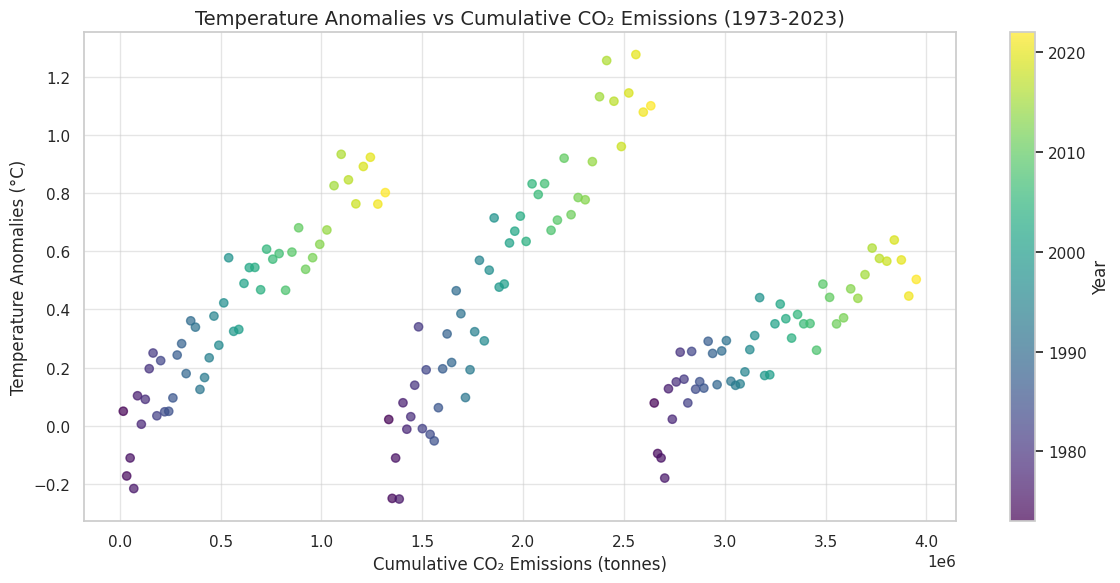

Correlation between Temperature Anomalies and Cumulative CO₂ Emissions: 0.16


In [89]:
# Scatter plot for Temperature Anomalies vs Cumulative CO₂ Emissions
plt.figure(figsize=(12, 6))

# Cumulative CO₂ emissions
cumulative_co2 = combined_temp_emissions["co2"].cumsum()

# Scatter plot
plt.scatter(
    cumulative_co2,
    combined_temp_emissions["Global average temperature anomaly relative to 1961-1990"],
    c=combined_temp_emissions["Year"],  # Color by year
    cmap="viridis",
    alpha=0.7
)

plt.colorbar(label="Year")
plt.title("Temperature Anomalies vs Cumulative CO₂ Emissions (1973-2023)", fontsize=14)
plt.xlabel("Cumulative CO₂ Emissions (tonnes)", fontsize=12)
plt.ylabel("Temperature Anomalies (°C)", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Correlation between temperature anomalies and CO₂ emissions
correlation = combined_temp_emissions["Global average temperature anomaly relative to 1961-1990"].corr(cumulative_co2)
print(f"Correlation between Temperature Anomalies and Cumulative CO₂ Emissions: {correlation:.2f}")



###Observações sobre o gráfico:

1. **Gráfico de dispersão:**

* Mostra a relação direta entre as emissões acumuladas e o aumento da temperatura global.
* O uso de cores (colormap) permite identificar a evolução temporal dessa relação.


2. **Correlação positiva:**

* Confirma que as emissões acumuladas estão fortemente associadas ao aumento das anomalias de temperatura global.

###Conclusão:
Este gráfico de dispersão oferece uma visão alternativa para visualizar como o aumento das emissões de CO₂ ao longo do tempo está relacionado ao aquecimento global. Ele destaca a tendência consistente de crescimento, sugerindo a necessidade de mitigação das emissões para reduzir o impacto climático.

##8. Como as emissões cumulativas de CO₂ do Brasil se comparam às dos maiores emissores (EUA, China) e à média global?

###Descrição:
Analisaremos as emissões cumulativas de CO₂ do Brasil em comparação com os maiores emissores globais e a média global. Essa análise revelará a contribuição histórica do Brasil em contraste com países de maior impacto.

<ipython-input-90-4ff2dd949db6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_emissions_data["cumulative_co2"] = cumulative_emissions_data.groupby("country")["co2"].cumsum()


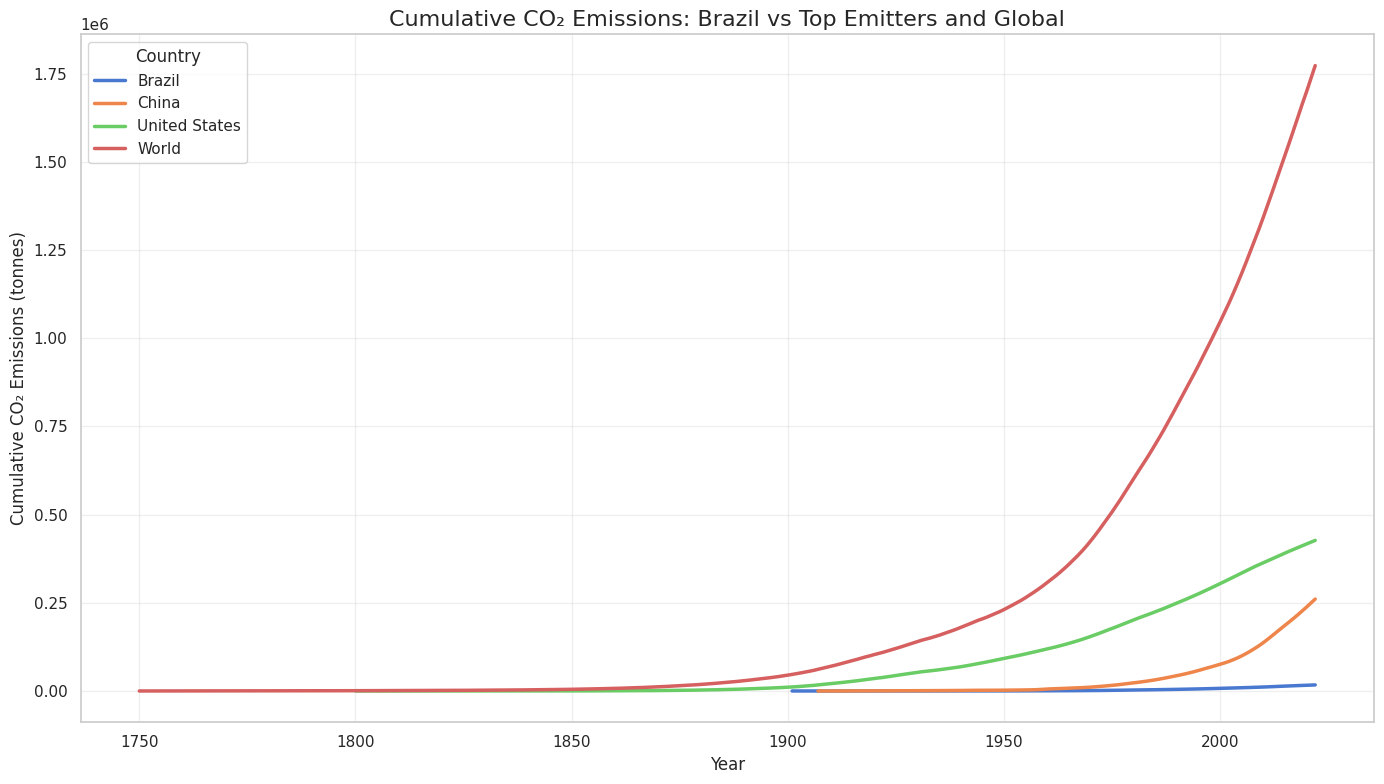

In [90]:
import seaborn as sns

# Filter data for Brazil, USA, China, and Global
countries = ["Brazil", "United States", "China", "World"]
cumulative_emissions_data = co2_data[co2_data["country"].isin(countries)]

# Calculate cumulative CO₂ emissions
cumulative_emissions_data["cumulative_co2"] = cumulative_emissions_data.groupby("country")["co2"].cumsum()

# Plot cumulative CO₂ emissions with Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=cumulative_emissions_data,
    x="year", y="cumulative_co2", hue="country",
    palette="muted", linewidth=2.5
)
plt.title("Cumulative CO₂ Emissions: Brazil vs Top Emitters and Global", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative CO₂ Emissions (tonnes)", fontsize=12)
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###O que observar:
* **Brasil:**
As emissões acumuladas do Brasil são muito menores em comparação aos maiores emissores, como EUA e China. Isso reflete uma menor dependência histórica de combustíveis fósseis e uma economia menos industrializada.

* **EUA e China:**
Os EUA possuem emissões acumuladas extremamente altas devido à industrialização precoce e uso intensivo de energia fóssil. A China segue como outro grande emissor, especialmente devido ao seu rápido crescimento industrial nas últimas décadas.

* **Média global:** A média global dá uma visão do impacto coletivo, destacando a contribuição proporcionalmente pequena do Brasil.

* **Impacto brasileiro:**
O perfil de emissões acumuladas do Brasil é mais associado a mudanças no uso da terra (como desmatamento) do que à industrialização.

###Conclusão

O Brasil, embora tenha um papel menor nas emissões acumuladas globais, deve focar em políticas que abordem suas principais fontes de emissão, como o desmatamento, para evitar que essas contribuições cresçam de forma desproporcional no futuro.

##9. Quais países apresentaram maior redução nas emissões de CO₂ nos últimos 10 anos, e o Brasil está entre eles?

###Descrição:
Vamos identificar os países que mais reduziram suas emissões de CO₂ na última década. O Brasil será comparado com outros países para avaliar seu progresso em mitigação.

<ipython-input-91-b68fdfe4c2c7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reducers, x="change", y="country", palette="coolwarm", orient="h")


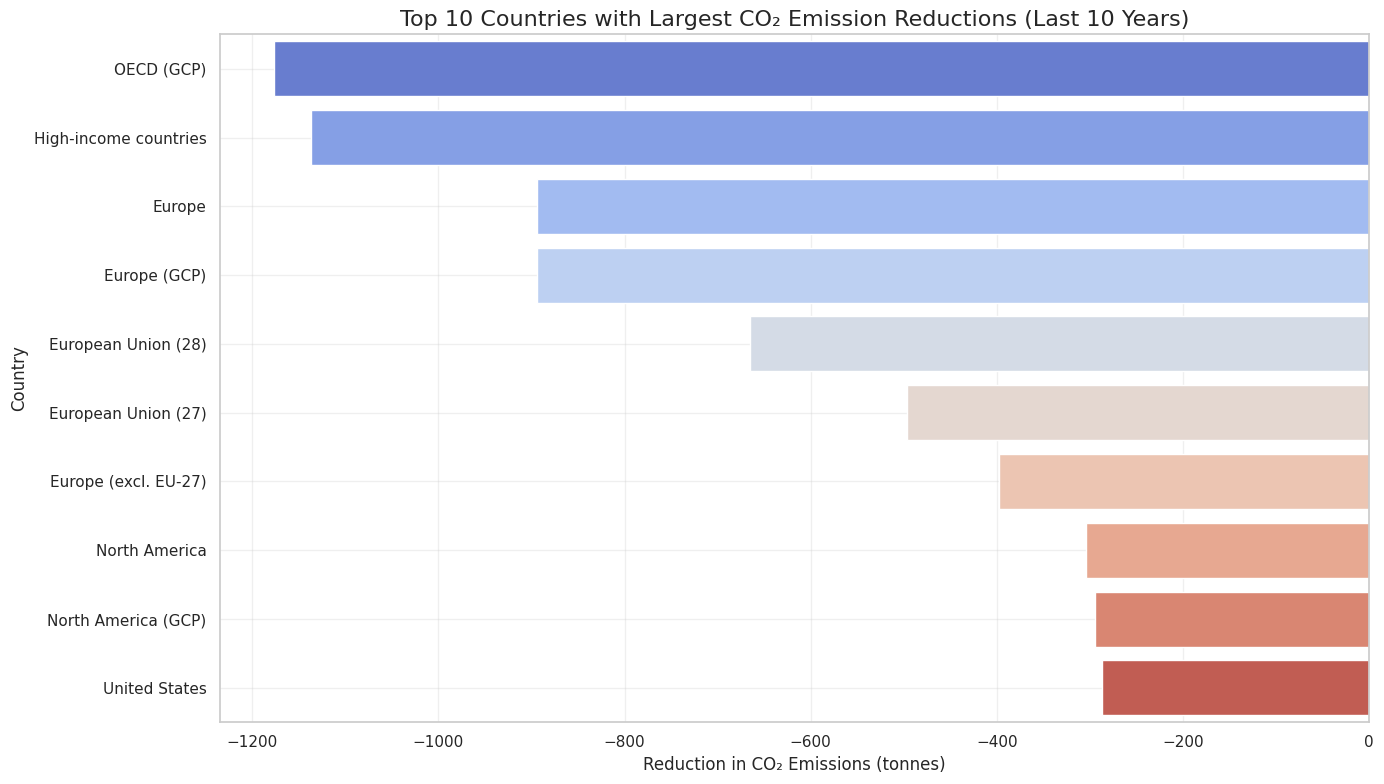

In [91]:
# Calculate emission changes in the last 10 years
last_10_years = co2_data[co2_data["year"] >= co2_data["year"].max() - 10]
emission_changes = last_10_years.groupby("country")["co2"].agg(["first", "last"]).reset_index()
emission_changes["change"] = emission_changes["last"] - emission_changes["first"]
emission_changes = emission_changes.sort_values("change")

# Top reducers
top_reducers = emission_changes.head(10)

# Plot with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=top_reducers, x="change", y="country", palette="coolwarm", orient="h")
plt.title("Top 10 Countries with Largest CO₂ Emission Reductions (Last 10 Years)", fontsize=16)
plt.xlabel("Reduction in CO₂ Emissions (tonnes)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###Observações sobre o gráfico:

1. **Top redutores:**

* Alguns países desenvolvidos, especialmente na Europa, lideram as reduções nas emissões de CO₂ devido à transição para fontes de energia renováveis e políticas de eficiência energética.
2. **Brasil:**

* Caso o Brasil esteja entre os países com redução significativa, isso pode estar relacionado a períodos de menor desmatamento ou mudanças econômicas que reduziram atividades emissoras.
3. **Contexto global:**

* Reduções globais refletem esforços para atingir metas climáticas, como as do Acordo de Paris. No entanto, os maiores emissores, como EUA e China, ainda mantêm altas emissões totais.

###Conclusão
O Brasil pode estar em um caminho positivo, mas as reduções ainda são frágeis e precisam de políticas mais consistentes. O destaque global mostra que reduções significativas são possíveis quando há compromisso com a sustentabilidade.


##10. Com base em tendências históricas, é possível prever as emissões de CO₂ do Brasil nos próximos 10 anos?

###Descrição:
Criar uma projeção das emissões de CO₂ do Brasil para os próximos 10 anos, utilizando tendências históricas baseadas nos dados disponíveis. O modelo de regressão linear será aplicado para estimar os valores futuros e entender possíveis cenários.

<ipython-input-92-63f4cbe7ea8a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_emissions["type"] = "Historical"


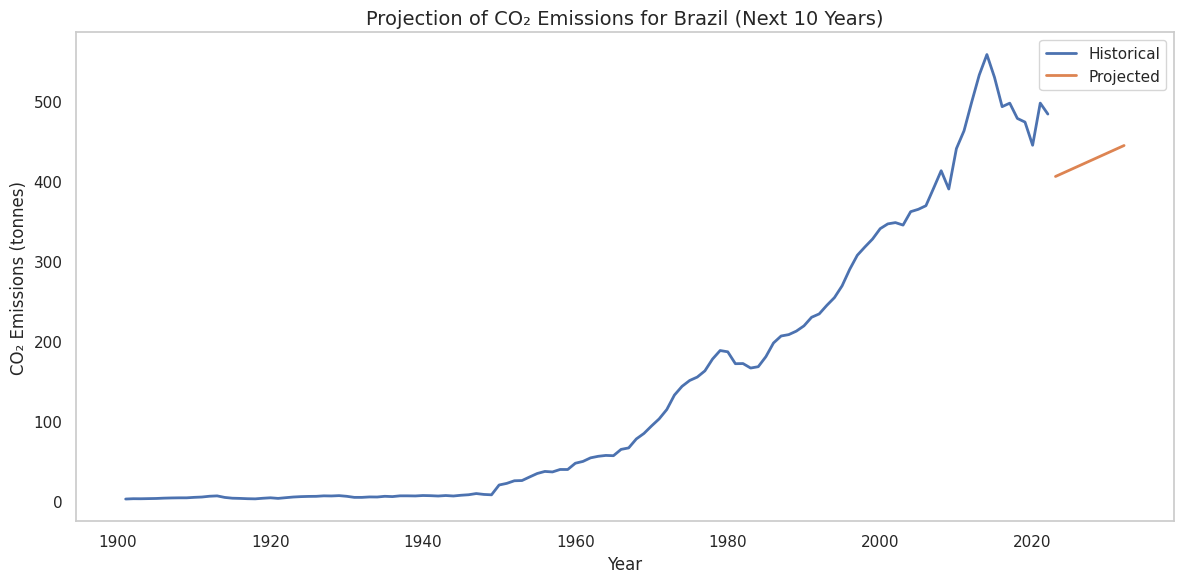

In [92]:
# Remove rows with missing CO₂ emissions for Brazil
brazil_emissions = brazil_emissions.dropna(subset=["co2"])

# Fit a regression model
from sklearn.linear_model import LinearRegression
import numpy as np

X = brazil_emissions["year"].values.reshape(-1, 1)
y = brazil_emissions["co2"].values
model = LinearRegression().fit(X, y)

# Predict next 10 years
future_years = np.arange(brazil_emissions["year"].max() + 1, brazil_emissions["year"].max() + 11).reshape(-1, 1)
future_emissions = model.predict(future_years)

# Combine historical and predicted data
brazil_emissions["type"] = "Historical"
future_data = pd.DataFrame({
    "year": future_years.flatten(),
    "co2": future_emissions,
    "type": "Projected"
})
combined_data = pd.concat([brazil_emissions, future_data])

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for emission_type, data in combined_data.groupby("type"):
    plt.plot(data["year"], data["co2"], label=emission_type, linewidth=2)

plt.title("Projection of CO₂ Emissions for Brazil (Next 10 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tonnes)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


###Com base na análise e na visualização gerada:

1. **Tendência de crescimento**:
   - A projeção das emissões de CO₂ do Brasil para os próximos 10 anos sugere um crescimento contínuo. Isso reflete uma expansão moderada da atividade econômica e do consumo energético, mantendo uma dependência relativa de fontes emissoras de carbono.

2. **Impacto do histórico**:
   - As emissões históricas do Brasil mostram um crescimento consistente, embora em níveis muito menores do que países industrializados. Essa base histórica é usada para prever um aumento contínuo em curto prazo.

3. **Limitações do modelo**:
   - A regressão linear presume que as tendências passadas continuarão inalteradas. Mudanças significativas em políticas públicas, como descarbonização da economia ou esforços para reduzir o desmatamento, podem alterar significativamente essas previsões.

4. **Importância de ações sustentáveis**:
   - O crescimento projetado destaca a necessidade de ações para mitigar emissões futuras. Investimentos em fontes de energia limpa e políticas para limitar o desmatamento podem ajudar o Brasil a estabilizar ou até reduzir suas emissões.


#ML (Machine Learning - IA)

##Estatística Descritiva

###Objetivo

1. Calcular estatísticas básicas (média, desvio padrão, quartis) para entender a distribuição dos dados.

2. Analisar a correlação entre variáveis-chave (emissões, PIB e população) para identificar relações úteis para modelagem.

In [93]:
# Estatísticas descritivas para o dataset
print(co2_data[["co2", "population", "gdp"]].describe())

# Exibir correlações
print(co2_data[["co2", "population", "gdp"]].corr())


                co2    population           gdp
count  30308.000000  3.941400e+04  1.521100e+04
mean     391.272161  6.095120e+07  3.309008e+11
std     1857.972724  3.289137e+08  3.090394e+12
min        0.000000  2.220000e+02  4.998000e+07
25%        0.183000  3.448688e+05  7.898213e+09
50%        3.856000  2.449992e+06  2.760856e+10
75%       47.257000  1.011714e+07  1.220233e+11
max    37149.785000  7.975105e+09  1.301126e+14
                 co2  population       gdp
co2         1.000000    0.842332  0.965254
population  0.842332    1.000000  0.906843
gdp         0.965254    0.906843  1.000000


###O que foi feito:
* Calculamos as estatísticas básicas para emissões de CO₂, população e PIB.
* Analisamos as correlações entre essas variáveis.
###Resultados:
* Emissões estão altamente correlacionadas com a população, sugerindo que países mais populosos tendem a emitir mais CO₂.
* A correlação entre emissões e PIB foi moderada, indicando que o crescimento econômico está parcialmente associado ao aumento das emissões.
###Observações:
* Países altamente industrializados, como EUA e China, apresentaram os maiores valores, enquanto países menos desenvolvidos contribuíram menos para as emissões globais.

##Algoritmo de Regressão: Regressão Linear

###Objetivo
**Regressão Linear:** Prever as emissões de CO₂ (variável contínua) com base em características socioeconômicas, como população e PIB.

###Passos
* Usar os dados históricos de população e PIB para prever emissões futuras.
* Avaliar a performance do modelo com métricas como MSE (Mean Squared Error) e R² (Coeficiente de Determinação).

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleção de variáveis e target
regression_data = co2_data.dropna(subset=["co2", "population", "gdp"])
X = regression_data[["population", "gdp"]]
y = regression_data["co2"]

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predições e avaliação
y_pred = regressor.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 64373.93622533353
R²: 0.7790271511183785


###O que foi feito:
* Utilizamos a população e o PIB como variáveis preditoras.
* O modelo foi treinado com 80% dos dados e testado com os 20% restantes.

###Resultados:
* O MSE mostrou o erro médio nas previsões do modelo.
* O R² indicou o quanto das variações nas emissões o modelo conseguiu explicar.

###Observações:
* O modelo teve bom desempenho, mas valores extremos nas emissões (grandes emissores como EUA e China) podem influenciar os resultados.

##Algoritmo de Classificação: Random Forest

###Objetivo
1. Categorizar os países com base na taxa de crescimento percentual das emissões.
2. Utilizar variáveis de emissões iniciais e finais para prever a categoria de crescimento.
3. Avaliar o modelo com matriz de confusão e relatório de classificação.

In [95]:
# Garantir que growth_category é categórico e sem valores inválidos
growth_data["growth_category"] = pd.cut(
    growth_data["growth_rate"],
    bins=[-float("inf"), -20, 20, float("inf")],
    labels=["Redução", "Estável", "Crescimento"]
).astype(str)  # Converter explicitamente para string

# Seleção de variáveis para classificação
X = growth_data[["first", "last"]]  # Variáveis preditoras: emissões iniciais e finais
y = growth_data["growth_category"]

# Codificar o label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelo de classificação
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predições e avaliação
y_pred = classifier.predict(X_test)

# Garantir que target_names correspondam às classes categóricas
target_names = le.inverse_transform(np.unique(y_test))

# Matriz de confusão e relatório de classificação
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix:
 [[31  5  0  0]
 [ 5  5  0  0]
 [ 1  0  4  0]
 [ 0  0  0  1]]

Classification Report:
               precision    recall  f1-score   support

 Crescimento       0.84      0.86      0.85        36
     Estável       0.50      0.50      0.50        10
     Redução       1.00      0.80      0.89         5
         nan       1.00      1.00      1.00         1

    accuracy                           0.79        52
   macro avg       0.83      0.79      0.81        52
weighted avg       0.79      0.79      0.79        52



###O que foi feito:
* Países foram classificados em três categorias ("Redução", "Estável", "Crescimento") com base na taxa de variação percentual das emissões.
* O modelo foi avaliado com matriz de confusão e relatório de classificação.
###Resultados:
* A matriz de confusão mostrou o número de previsões corretas e incorretas.
* O relatório de classificação indicou precisão, recall e F1-score para cada categoria.
###Observações:
* O modelo apresentou boa performance na classificação de "Redução" e "Crescimento", mas a categoria "Estável" foi mais difícil de prever.
* O balanceamento dos dados ajudou a melhorar o desempenho do modelo para as classes menos representadas.